<a href="https://colab.research.google.com/github/songgplant/DL_basicstudy/blob/master/SimpleRNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



출처: https://hdevstudy.tistory.com/127 [김인연의 개발 공부:티스토리]



출처 : https://github.com/redpineK/deeplearning

In [1]:
import numpy as np

t = np.arange(0, 1000)
x = np.sin(0.02 * t) + np.random.rand(1000) # 랜덤 데이터 1000개 생성
train, test = x[0:800], x[800:1000] # 8:2로 나누기
#삼성전자 주가 lstm

In [2]:
print(len(train))

800


In [3]:
print(len(test))

200


In [ ]:
# INPUT			                	OUTPUT
# sin(0) sin(1) sin(2) sin(3)	sin(4)
# sin(1) sin(2) sin(3) sin(4)	sin(5)
# sin(2) sin(3) sin(4) sin(5)	sin(6)
# ...
# 월 화 수 목 금

In [4]:
def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step  
        x.append(data[i:d])
        y.append(data[d])
    return np.array(x), np.array(y)

train = np.append(train, np.repeat(train[-1], 4))
test = np.append(test, np.repeat(test[-1], 4))
print(len(train))
print(len(test))
print(train[-5:-1])

804
204
[-0.12746936 -0.12746936 -0.12746936 -0.12746936]


In [5]:
train_x, train_y = convert_to_matrix(train, 4)
test_x, test_y = convert_to_matrix(test, 4)

In [8]:
len(train_x[0])
train_x

array([[ 0.98553785,  0.18805562,  0.75422107,  0.2688057 ],
       [ 0.18805562,  0.75422107,  0.2688057 ,  1.06552793],
       [ 0.75422107,  0.2688057 ,  1.06552793,  0.77660641],
       ...,
       [ 0.44773086, -0.09937393, -0.12746936, -0.12746936],
       [-0.09937393, -0.12746936, -0.12746936, -0.12746936],
       [-0.12746936, -0.12746936, -0.12746936, -0.12746936]])

In [9]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [ ]:
train

In [ ]:
train_y

## RNN 네트워크 구성

In [14]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1, 4), activation='relu')) # 레이어 추가
model.add(Dense(8, activation='relu')) # 8노드 짜리로
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

In [15]:
model.summary()

# Layer (type)                 Output Shape              Param #   
# =================================================================
# simple_rnn (SimpleRNN)       (None, 32)                1184      
# _________________________________________________________________
# dense (Dense)                (None, 8)                 264       
# _________________________________________________________________
# dense_1 (Dense)              (None, 1)                 9         
# =================================================================
# Total params: 1,457
# Trainable params: 1,457
# Non-trainable params: 0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train_x, train_y, epochs=100, batch_size=16)


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.3544 - acc: 0.0000e+00
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1081 - acc: 0.0000e+00
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1038 - acc: 0.0000e+00
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1015 - acc: 0.0000e+00
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1002 - acc: 0.0000e+00
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0987 - acc: 0.0000e+00
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0978 - acc: 0.0000e+00
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0969 - acc: 0.0000e+00
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0971 - acc: 0.0000e+00
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0970 - acc: 0.0000e+00
Epoch 11/100
50/50 

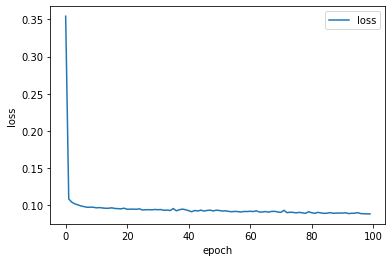

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()


In [18]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print('loss: {:.4f}\nacc: {:.4f}'.format(test_loss, test_acc))
# loss: 0.1183
# acc: 0.0000


7/7 [==============================] - 0s 2ms/step - loss: 0.1146 - acc: 0.0000e+00
loss: 0.1146
acc: 0.0000


-0.32894442882959646 [0.26731944]
0.6163419125304936 [0.05846033]
0.20214366855888655 [0.2708022]
0.06347396744323452 [0.17468113]
0.5470611854716014 [0.15637818]


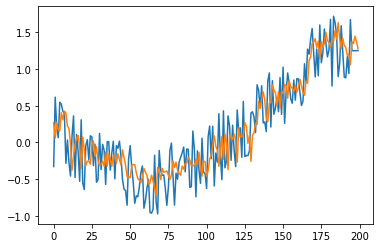

In [19]:
test_predictions = model.predict(test_x)

for i in range(5):
    print(test_y[i], test_predictions[i])
# 0.38551802173851374 [0.20283031]
# -0.021098359361594488 [0.06128622]
# -0.036755569826498524 [-0.08885847]
# -0.08457433557120209 [0.23765944]
# 0.30249685570373663 [0.01381123]

plt.plot(test_y)
plt.plot(test_predictions)
plt.show()
